 Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df= pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and
9 columns. Customers can have multiple orders but a customer ID is always unique

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are no missing values and 3 different datatypes: float=1, int=4, obj=4. Rating, in theory is numerical but due to reviews 'Not Given' it's being read as an object.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The data has currently no actual missing values. However, the rating reviews of "Not Given' can be considered missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The data shows, that 50% of the food took 27 min to prepare and the other half took about 27 min or less. There should be an expected variation from the preperation time average (27 mins) by amount 4.6 mins either added or subtracted to the 27 mins. Similarly, the averge delivery time takes about 24 min for the order to be delivered. However, there should also be an expected variation from the delivery time (24 mins) by amount 4.9 mins either added or subtracted to the 24 mins. On average the customer can expect the total wait time from food preperation to delivery time to be around 51.53 minutes with an added or subtracted variation time.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
print('Orders not rated:')
df['rating'].value_counts().head(1)

Orders not rated:


,count
rating,
Not given,736


In [ ]:
print('Overall ratings:')
df['rating'].value_counts()

Overall ratings:


,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
df['rating'].value_counts(normalize=True)*100

,proportion
rating,
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


In [ ]:
df['rating']= df['rating'].replace('Not given', np.nan)



In [ ]:
df['rating']= df['rating'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


#### Observations:


About 38% of the orders are not rated. It's important to better understand why some customers are not rating their orders.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,3
food_preparation_time,16
delivery_time,19


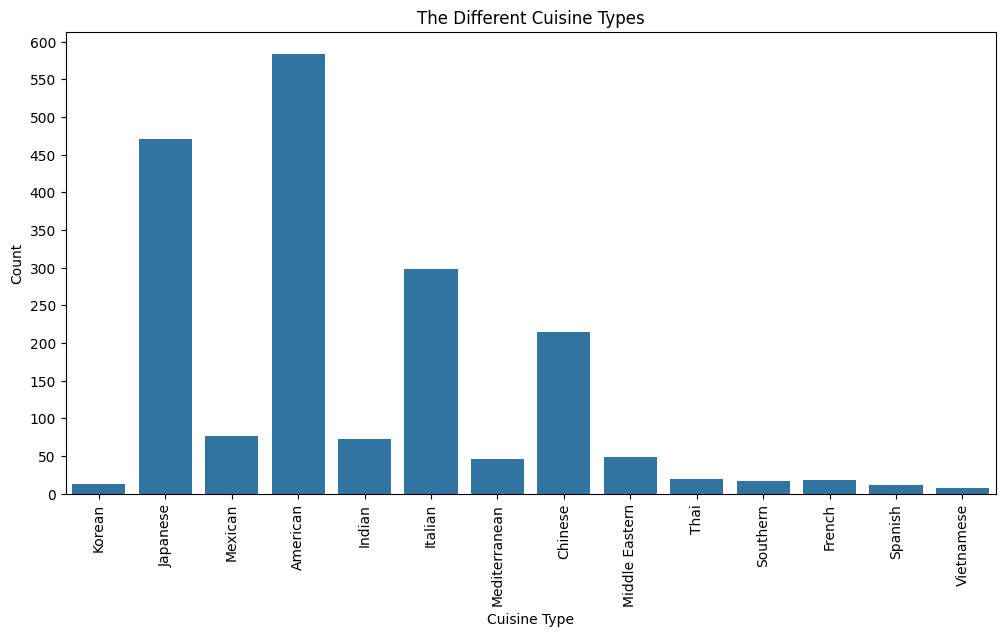

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('The Different Cuisine Types')
plt.yticks(ticks=range(0, 620, 50))
plt.show()




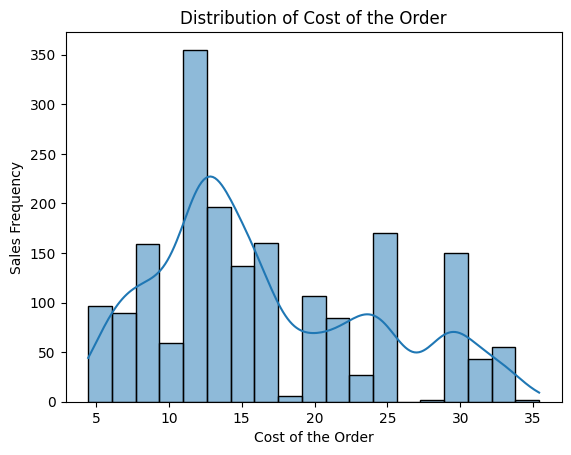

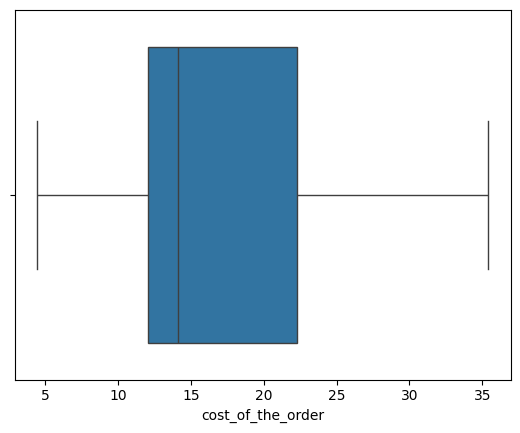

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.xlabel('Cost of the Order')
plt.ylabel('Sales Frequency')
plt.title('Distribution of Cost of the Order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()


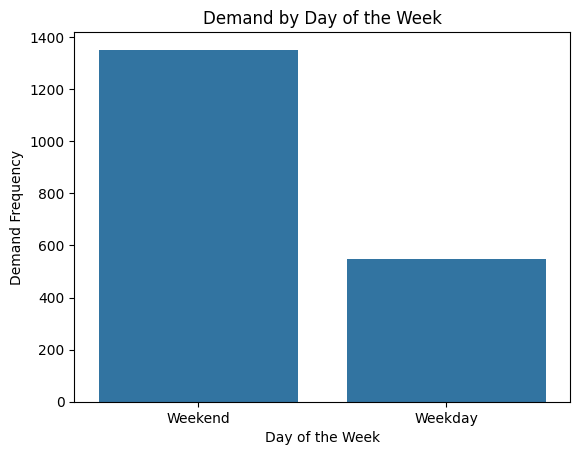

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Demand Frequency')
plt.title('Demand by Day of the Week')
plt.show()


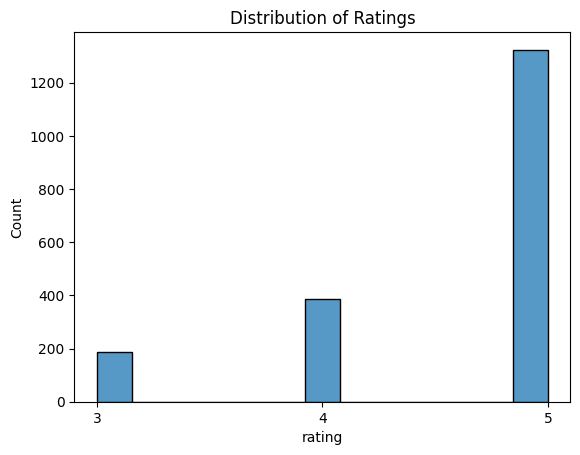

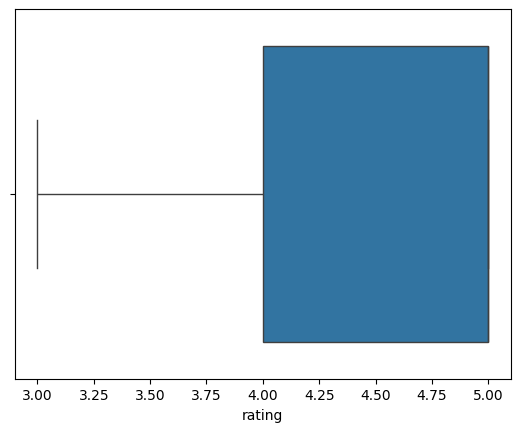

In [ ]:
sns.histplot(data=df, x='rating')
plt.xticks([3, 4, 5])
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()
sns.boxplot(data=df, x='rating')
plt.show()

In [ ]:
median_rating= df['rating'].median()
median_rating

5.0

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Shake Shake is the top restraurant

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
weekend_data= df[df['day_of_the_week']=='Weekend']
cuisine_counts= weekend_data['cuisine_type'].value_counts()
print('Most popular cuisine on weekends:')
print(cuisine_counts.head(1))
cuisine_counts.head()

Most popular cuisine on weekends:
cuisine_type
American    415
Name: count, dtype: int64


,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
American cuisine is the top cuisine similar to that of the restraurant Shake Shack being American cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
total_orders= len(df)
orders_over_20= len(df[df['cost_of_the_order']>20])
percentage_over_20= (orders_over_20/total_orders)*100
print(f'Percentage of orders costing more than $20: {percentage_over_20:.2f}%')

Percentage of orders costing more than $20: 29.24%


#### Observations:
70.76% of the orders are less than $20. Most customers place orders that are less than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
avg_delivery_time= df['delivery_time'].mean()
print(f'Average order delivery time: {avg_delivery_time:.2f} minutes')



Average order delivery time: 24.16 minutes


#### Observations:
Expectation based on average delivery time will hold a lot of weight on customer experience.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
top_3_customers= df['customer_id'].value_counts().head(3)
print('Top 3 most frequent customers:')
print(top_3_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The most frequent customer has ordered 13 times.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Text(0.5, 1.0, 'Correlation Matrix between Numerical Variables')

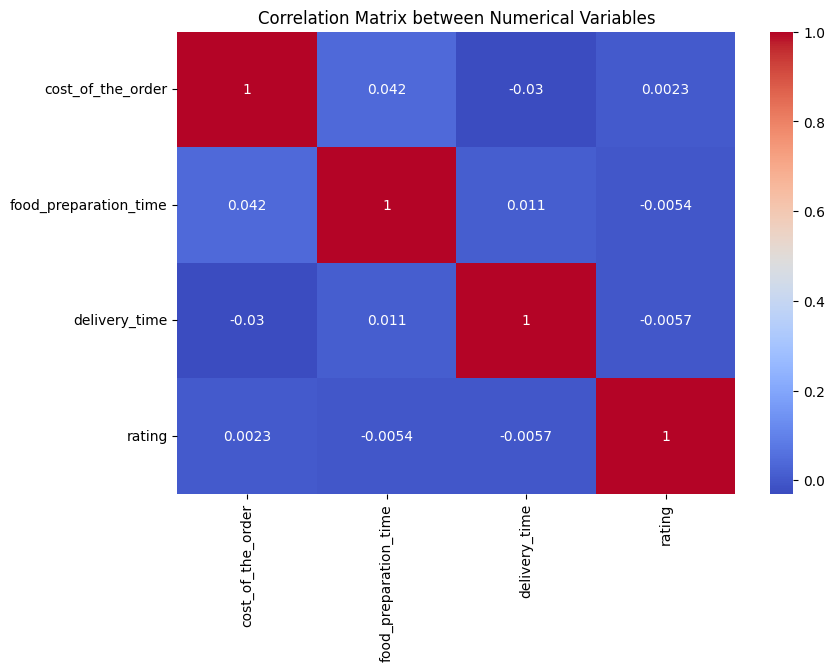

In [ ]:
# Write the code here
numeric_columns= df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']]
plt.figure(figsize=(9, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Numerical Variables')


Text(0, 0.5, 'Cost of the Order')

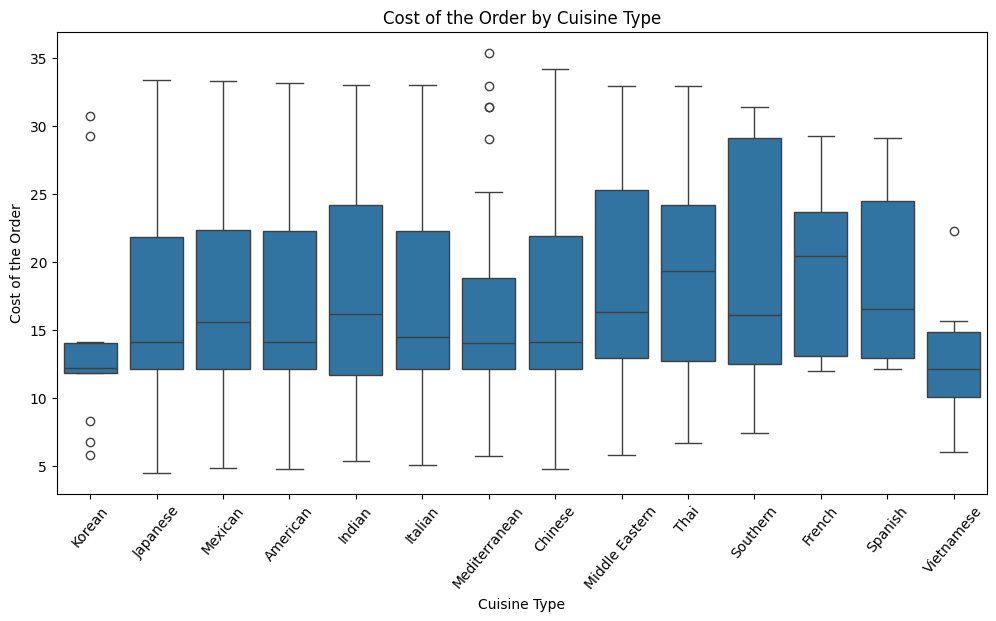

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=50)
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


Text(0, 0.5, 'Rating')

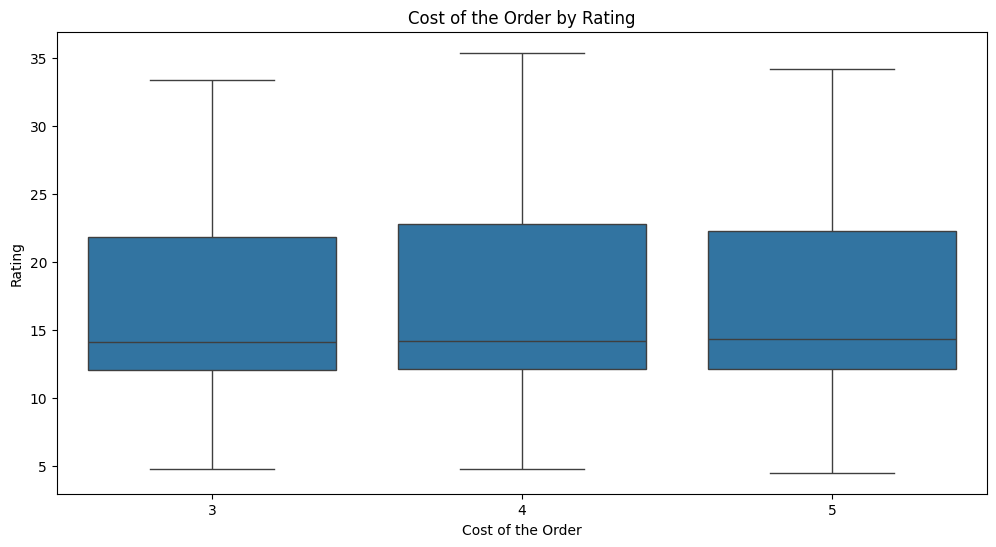

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Cost of the Order by Rating')
plt.xlabel('Cost of the Order')
plt.ylabel('Rating')

Text(0, 0.5, 'Delivery Time')

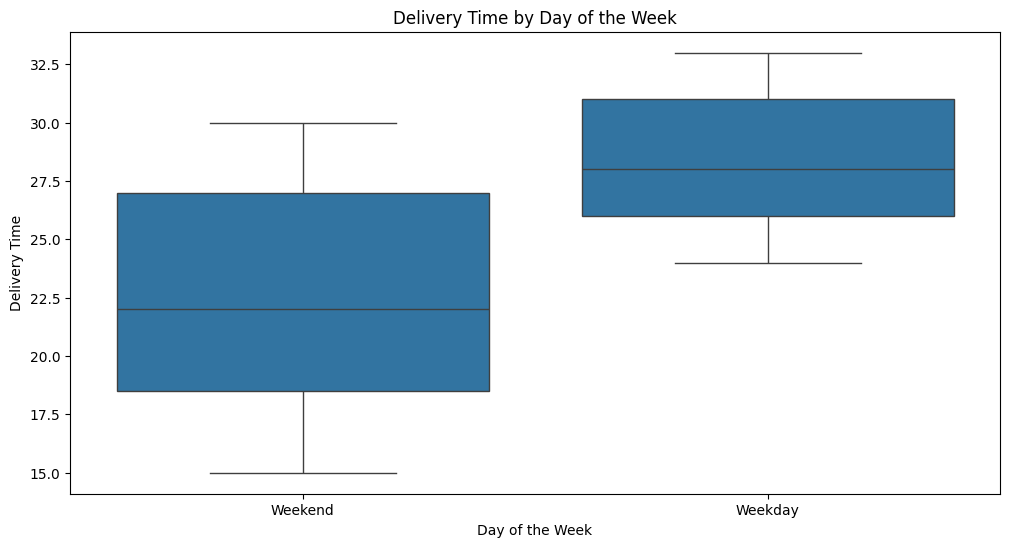

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')

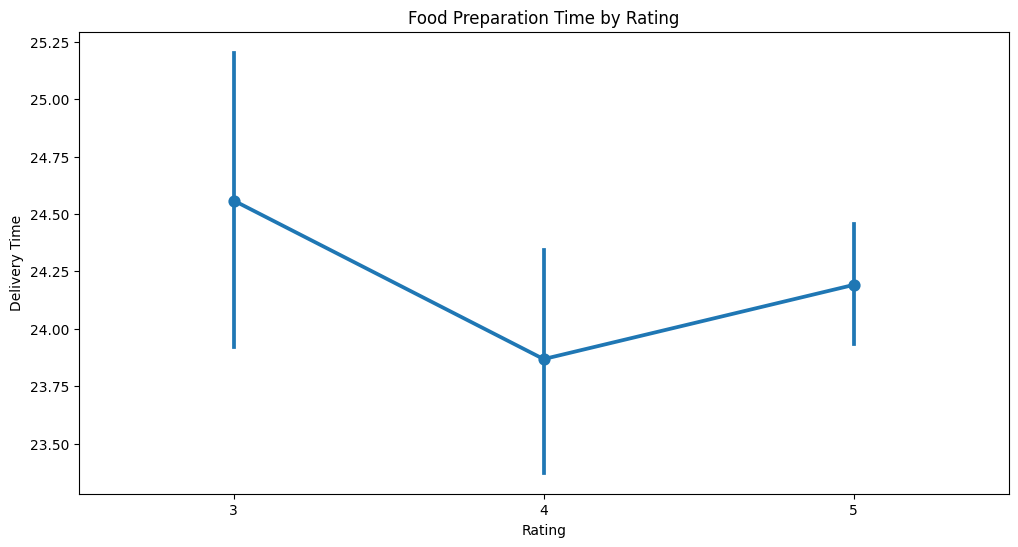

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='rating', y='delivery_time', data=df)
plt.title('Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

Text(0, 0.5, 'Delivery Time')

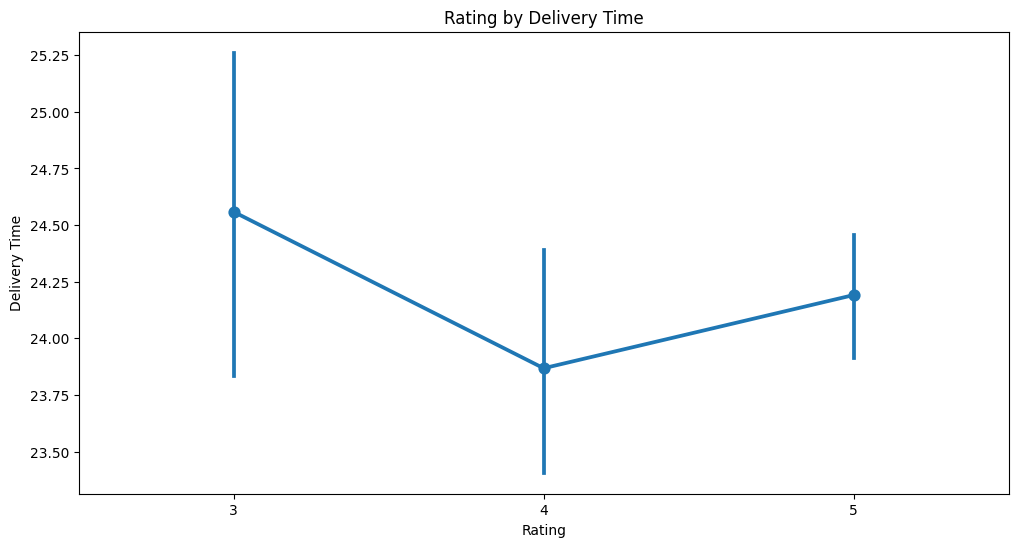

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='rating', y='delivery_time', data=df)
plt.title('Rating by Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
df_rated= df[df['rating'] != 'Not Given'].copy()
df_rated['rating']= df_rated['rating'].astype(int)
rating_counts= df_rated['restaurant_name'].value_counts()
elig_restaurants= rating_counts[rating_counts>50].index
df_filtered= df_rated[df_rated['restaurant_name'].isin(elig_restaurants)]
avg_ratings= df_filtered.groupby('restaurant_name')['rating'].mean()
restaurants_for_promotion= avg_ratings[avg_ratings>4]
print('Restaurants that are eligible for promotional offer:')
print(restaurants_for_promotion)

Restaurants that are eligible for promotional offer:
restaurant_name
Blue Ribbon Fried Chicken    4.552083
Blue Ribbon Sushi            4.521008
Parm                         4.500000
RedFarm Broadway             4.474576
RedFarm Hudson               4.490909
Shake Shack                  4.561644
The Meatball Shop            4.689394
Name: rating, dtype: float64


#### Observations:
The following 7 restaurants that are eligible for the promotional offer: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Parm, Redfarm Broadway, Redfarm Hudson, Shake Shack, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def compute_rev(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return 0

df['revenue']= df['cost_of_the_order'].apply(compute_rev)
total_rev= df['revenue'].sum()
print(f'Total Revenue:', round(total_rev, 2), 'dollars')

Total Revenue: 6166.3 dollars




```
# This is formatted as code
```

#### Observations:
The net revenue generated across all orders was $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time']= df['food_preparation_time'] + df['delivery_time']
long_orders= df[df['total_time']>60].shape[0]
total_orders= df.shape[0]
percentage= (long_orders/total_orders)*100
print('Percentage of orders taking more than 60 minutes to deliver:', round(percentage, 2), '%')

Percentage of orders taking more than 60 minutes to deliver: 10.54 %


#### Observations:
At least 89.46% of the orders take less than 60 minutes to get delivered. For the 10.54% that take more than 60 minutes it's important to ensure enough drivers and restaurant staff to minimize hold ups.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
weekday_mean= df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
weekend_mean= df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print('Mean delivery time on weekdays:', round(weekday_mean, 2), 'minutes')
print('Mean delivery time on weekends:', round(weekend_mean, 2), 'minutes')

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Based on the analysis, I observed that only a select group of restaurants consistently receive ratings above 4 with more than 50 orders. Suggesting that while some restaurants are delivering strong customer satisfaction, others need support in improving quality service. Also, there are many restaurants that are missing out on the opportunity of improving customer experience by not have any ratings at all. Additionally, revenue analysis revealed that the majority of the company's income comes from orders priced over $20. This shows that high value orders are key contributors to a business success. Regarding the delivery performance a significant number of orders take more than 60 minutes to reach the customer. This could negatively impact the customer satisfaction. Weekday deliveries were found to take longer on average than the weekend deliveries. Things to keep in mind to improve weekday orders are weekday traffic, order volume, or operational inefficiencies.

### Recommendations:

*  To enhance customer experience, the company should consider implementing real time order tracking, providing transparency so that customers know what to expect for their wait time. Improving the accuracy of estimated delivery times, accounting for weekday vs weekend differences, will also help manage expectations and build trust. Encouraging restaurants to maintain high food quality and consistent service by sharing performancy insights can lead to a better customer satisfaction. Providing drivers with a rewards program for timely deliveries and effective communication could also promote a positive experience.  Additionally, oferring prompt and effective customer support through the app to help navigate complaints provides the ability to rectify a negative situation further aiding to a positive experience. To incentivize customers to provide ratings, the company can implement perks such as discounts or loyalty points for each feedback subission. It recommended that the process be quick, mobile friendly, and rewarded but optional. This can improve response rates while helping the company gather more data to refine needs and service quality.

---